
特此声明，以下代码不存在剽窃，抄袭行为。


二维空间下匀速主动粒子的集群运动，并建立如下模型：
 
$$
\left\{
                 \begin{array}{lr}
                 x_{k}^{'}(t)=(\cos{\theta_{k}},\sin{\theta_{k}}), &  \\
                 \theta_{k}^{'}(t)=\frac{\beta}{N}\sum_{j=1}^{N}\phi(\left\|x_{k}(t)-x_{j}(t)\right\|)\sin(\theta_{j}-\theta_{k}). &
                 \end{array}
\right.
$$
其中：
$$
\phi(r)=1+\frac{1}{1+r^{2}}.
$$


In [1]:
import numpy as np #导入相关的库
import math
import random
from matplotlib import pyplot as plt
from matplotlib import animation

In [2]:
class Bird: #
    def __init__(self, pos, speed, angle) :
        self.pos = pos
        self.speed = speed
        self.angle = angle
    def displayPos(self):    
        print(self.pos)
    def displaySpeed(self):
        s=[]
        s.append(self.speed)
        s.append(self.angle)
        print(s)
    def changeAngle(self, newangle):
        self.angle = newangle
    def changePos(self, newpos):
        self.pos = newpos

定义一些有用的函数：

In [3]:
def StartVicsek(N): #给出初始位置
    for i in range(N):
        posx=5*random.uniform(0,1)
        posy=5*random.uniform(0,1)
        pos=[]
        pos.append(posx)
        pos.append(posy)
        speed=1
        angle=2*np.pi*np.random.normal()
        d['Bird'+str(i)] = Bird(pos,speed,angle)
        d['Origin'+str(i)] = Bird(pos,speed,angle)

def ToOrigin(N): #回到初始状态
    for i in range(N):
        d['Bird'+str(i)].changePos(d['Origin'+str(i)].pos)
        d['Bird'+str(i)].changeAngle(d['Origin'+str(i)].angle)
        
def analy(beta, k, N): #计算\phi函数
    s = 0
    for i in range(N):
        s+=(1+1/(1+(((d['Bird'+str(i)].pos[0]-d['Bird'+str(k)].pos[0])**2+((d['Bird'+str(i)].pos[1]-d['Bird'+str(k)].pos[1]))**2)**(1/2))**2))*np.sin(d['Bird'+str(i)].angle-d['Bird'+str(k)].angle)
    s=s*beta/N
    return s
    
def chooseBird(number, N): #抽取若干只
    a = set()
    while len(a)<number:
        a.add(random.randint(0, N-1))
    return list(a)

def VicsekPos(beta, N, T): #给出T时刻后，每只的位置
    for j in range(T):
        for i in range(N):
            newpo = []
            newpox = d['Bird'+str(i)].pos[0]+np.cos(d['Bird'+str(i)].angle)
            newpoy = d['Bird'+str(i)].pos[1]+np.sin(d['Bird'+str(i)].angle)
            newpo.append(newpox)
            newpo.append(newpoy)
            d['Bird'+str(i)].changePos(newpo)
            newan=analy(beta, i, N)+d['Bird'+str(i)].angle
            d['Bird'+str(i)].changeAngle(newan)
    x = []
    y = []
    for i in range(N):
        x.append(d['Bird'+str(i)].pos[0])
        y.append(d['Bird'+str(i)].pos[1])
    return x,y

def plotVicsek(times, number, beta, N): 
    x = []
    y = []
    Newcrowd = chooseBird(number, N)
    plt.figure(figsize=(15, 7)) 
    for j in range(times):
        for i in range(N):
            newpo=[]
            newpox=d['Bird'+str(i)].pos[0]+np.cos(d['Bird'+str(i)].angle)
            newpoy=d['Bird'+str(i)].pos[1]+np.sin(d['Bird'+str(i)].angle)
            newpo.append(newpox)
            newpo.append(newpoy)
            d['Bird'+str(i)].changePos(newpo)
            newan=analy(beta, i, N)+d['Bird'+str(i)].angle
            d['Bird'+str(i)].changeAngle(newan)      
        for i in Newcrowd:
            dnow = ((d['Bird'+str(i)].pos[0]-d['Origin'+str(i)].pos[0])**2+((d['Bird'+str(i)].pos[1]-d['Origin'+str(i)].pos[1]))**2)**(1/2)
            annow = (math.asin(np.sin(d['Bird'+str(i)].angle))/np.pi)*180
            plt.subplot(131)
            plt.plot(j,dnow,'b.')
            plt.title("Translocation") 
            plt.subplot(132)
            plt.plot(j,annow,'b.') 
            plt.title("Direction")
        dmin=findDmin(N)
        plt.subplot(133)
        plt.plot(j,dmin,'b.')
        plt.title("Dmin")
    plt.show()
    plt.close()
    
def findDmin(N): 
    Dmin = ((d['Bird'+str(0)].pos[0]-d['Bird'+str(1)].pos[0])**2+((d['Bird'+str(0)].pos[1]-d['Bird'+str(1)].pos[1]))**2)**(1/2)
    for i in range(N):
        for j in range(N):
            if i != j:
                D=((d['Bird'+str(i)].pos[0]-d['Bird'+str(j)].pos[0])**2+((d['Bird'+str(i)].pos[1]-d['Bird'+str(j)].pos[1]))**2)**(1/2)
                if D < Dmin:
                    Dmin = D
    return Dmin

给出100只鸟，作图观察它们的位移、速度方向、最短间距。  
如图所示，我们的模型是收敛的（最后会成为一个整体）。

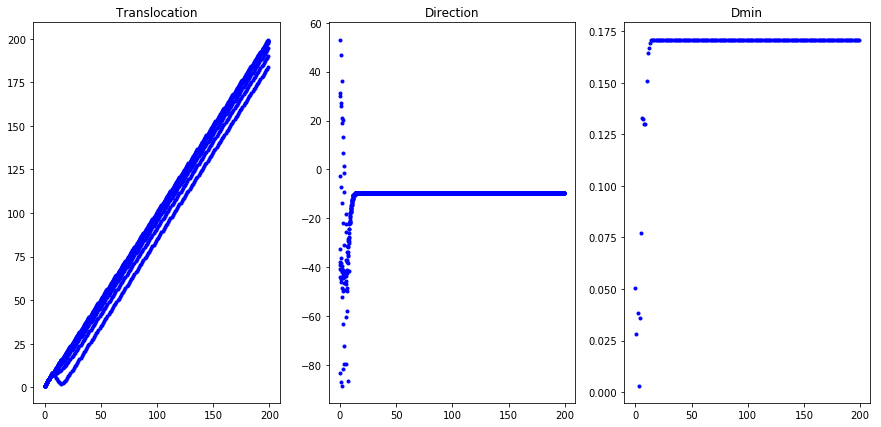

In [4]:
d = {}
N = 100
beta = 1
StartVicsek(N)
plotVicsek(200, 10, beta, N)

用空心圆表示每只鸟，将本场景做成动画，如附件“Vicsek.mp4”所示。

In [5]:
fig = plt.figure()
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50))
line, = ax.plot([], [],'bo',mfc='none') 
StartVicsek(N)
def init():
    line.set_data([], [])
    return line,

def animate(i):
    x, y = VicsekPos(beta, N, 1)
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=50, blit=True)

anim.save('Vicsek.mp4', fps=15, extra_args=['-vcodec', 'libx264'])
plt.close()

In [20]:
class Bird:
    #给定其位置、速度、加速度
    #为简化起见，暂时未考虑其个体的速度加速度上下限，以后可以进行添加
    def __init__(self, pos, speed, acce):
        self.pos = pos
        self.speed = speed
        self.acce = acce #加速度
    def displayPos(self):    
        print(self.pos)
    def displaySpeed(self):
        print(self.speed)
    def displayAcce(self):
        print(self.acce)
    def changeSpeed(self, newspeed):
        self.speed = newspeed
    def changePos(self, newpos):
        self.pos = newpos
    def changeAcce(self, newacce):
        self.acce = newacce

定义以下若干个有用的函数：

In [7]:
def StartCucker(dim, N): #生成给定维数空间的给定数量只鸟
    for i in range(N):
        dimnow = 0
        pos = []
        speed = []
        acce = []
        while dimnow < dim:
            dimnow += 1
            pos.append(10*random.uniform(0,1))
            speed.append(random.uniform(0,1))
            acce.append(0)
        d['Bird'+str(i)] = Bird(pos,speed,acce)
        d['Origin'+str(i)] = Bird(pos,speed,acce)

def StartTango(dim, N): #生成给定维数空间的向目标点进发的给定数量只鸟，这里目标点给的是（50,50）
    for i in range(N):
        dimnow = 0
        pos = []
        speed = []
        acce = []
        sp = random.uniform(0,1)
        while dimnow < dim:
            dimnow += 1
            po = 10*random.uniform(0,1)
            pos.append(po)
            speed.append(sp*(50-po)/50)
            acce.append(0)
        d['Bird'+str(i)] = Bird(pos,speed,acce)
        d['Origin'+str(i)] = Bird(pos,speed,acce)
        
def ToOrigin(N): #回归初始状态
    for i in range(N):
        d['Bird'+str(i)].changePos(d['Origin'+str(i)].pos)
        d['Bird'+str(i)].changeAcce(d['Origin'+str(i)].acce)
        d['Bird'+str(i)].changeSpeed(d['Origin'+str(i)].speed)

def DifferSpeed(dim, m, n): #求速度的差值
    diff = []
    for i in range(dim):
        dd = d['Bird'+str(m)].speed[i]-d['Bird'+str(n)].speed[i]
        diff.append(dd)
    return diff

def DifferPos(dim, m, n): #求位置的差值
    diff = []
    for i in range(dim):
        dd = d['Bird'+str(m)].pos[i]-d['Bird'+str(n)].pos[i]
        diff.append(dd)
    return diff
    
def FindPosNorm(dim, m, n): #求位置差值的范数
    s = 0
    for i in range(dim):
        s += (d['Bird'+str(m)].pos[i]-d['Bird'+str(n)].pos[i])**2
    NormPos = s**0.5
    return NormPos

def FindSpeedNorm(dim, m, n): #求速度差值的范数
    s = 0
    for i in range(dim):
        s += (d['Bird'+str(m)].speed[i]-d['Bird'+str(n)].speed[i])**2
    NormSpeed = s**0.5
    return NormSpeed

def chooseBird(number, N): #选取若干只鸟
    a = set()
    while len(a)<number:
        a.add(random.randint(0, N-1))
    return list(a)
    
def findDmin(N): #寻找最短距离（这里偷懒先以二维空间为例）
    Dmin = ((d['Bird'+str(0)].pos[0]-d['Bird'+str(1)].pos[0])**2+((d['Bird'+str(0)].pos[1]-d['Bird'+str(1)].pos[1]))**2)**(1/2)
    for i in range(N):
        for j in range(N):
            if i != j:
                D=((d['Bird'+str(i)].pos[0]-d['Bird'+str(j)].pos[0])**2+((d['Bird'+str(i)].pos[1]-d['Bird'+str(j)].pos[1]))**2)**(1/2)
                if D < Dmin:
                    Dmin = D
    return Dmin

根据参考文献[2]，建立如下模型（Cucker-Smale模型），代码如下所示：
$$
\left\{
                 \begin{array}{lr}
                 x_{k}^{'}(t)=v_{k}(t), &  \\
                 v_{k}^{'}(t)=\frac{\beta}{N}\sum_{j=1}^{N}\frac{L}{(\rho^{2}+\left\|x_{k}(t)-x_{j}(t)\right\|^{2})^{\theta}}(v_{j}(t)-v_{k}(t)),\quad L,\rho>0, \theta \geq 0. &
                 \end{array}
\right.
$$
值得注意的是，这里先以二维空间为例。

In [8]:
def SmaleFunction(beta, k, N, H, b, dim): #为计算其中的函数
    s = []
    lam = 0
    for i in range(dim):
        s.append(0)
    for j in range(N):
        a = H / (1 + FindPosNorm(dim, k, j)**2)**b
        diffv = DifferSpeed(dim, j, k)
        for i in range(dim):
            s[i] += a * diffv[i]
    for i in range(dim):
        s[i] = s[i] * beta / N
    return s

def plotSmale(times, number, beta, N, H, b): #作图，得到每时刻被抽取的鸟的x方向速度分量、y方向速度分量、最短间距
    x = []
    y = []
    Newcrowd = chooseBird(number, N)
    plt.figure(figsize=(15, 7)) 
    for j in range(times):
        for i in range(N):
            newpo=[]
            newpox=d['Bird'+str(i)].pos[0]+1*d['Bird'+str(i)].speed[0]
            newpoy=d['Bird'+str(i)].pos[1]+1*d['Bird'+str(i)].speed[1]
            newpo.append(newpox)
            newpo.append(newpoy)
            d['Bird'+str(i)].changePos(newpo)
            s=SmaleFunction(beta, i, N, H, b, 2)
            newSpeed1=1*s[0]+d['Bird'+str(i)].speed[0]
            newSpeed2=1*s[1]+d['Bird'+str(i)].speed[1]
            newsp=[]
            newsp.append(newSpeed1)
            newsp.append(newSpeed2)
            d['Bird'+str(i)].changeSpeed(newsp)      
        for i in Newcrowd:
            plt.subplot(131)
            plt.plot(j,d['Bird'+str(i)].speed[0],'b.')
            plt.title("Vx")
            plt.subplot(132)
            plt.plot(j,d['Bird'+str(i)].speed[1],'b.')
            plt.title("Vy")
        dmin=findDmin(N)
        plt.subplot(133)
        plt.plot(j,dmin,'b.')
        plt.title("Dmin")
    print("鸟之间最短间距是："+str(dmin))
    plt.show()
    plt.close()

def CSPos(N, T, dt): #给出T时刻后，每只鸟的位置
    for j in range(T):
        for i in range(N):
            newpo = []
            newsp = []
            newpox = d['Bird'+str(i)].pos[0]+dt*d['Bird'+str(i)].speed[0]
            newpoy = d['Bird'+str(i)].pos[1]+dt*d['Bird'+str(i)].speed[1]
            newpo.append(newpox)
            newpo.append(newpoy)
            d['Bird'+str(i)].changePos(newpo)
            acc = SmaleFunction(beta, i, N, H, b, 2)
            d['Bird'+str(i)].changeAcce(acc)
            newsp1=d['Bird'+str(i)].speed[0]+dt*d['Bird'+str(i)].acce[0]
            newsp2=d['Bird'+str(i)].speed[1]+dt*d['Bird'+str(i)].acce[1]
            newsp.append(newsp1)
            newsp.append(newsp2)
            d['Bird'+str(i)].changeSpeed(newsp)
    x = []
    y = []
    for i in range(N):
        x.append(d['Bird'+str(i)].pos[0])
        y.append(d['Bird'+str(i)].pos[1])
    return x, y

给出100只鸟（其初始位置，初始速度满足均匀分布），作图观察它们的各方向速度分量、最短间距。  
如图所示，我们的模型是收敛的（最后会成为一个整体）。

鸟之间最短间距是：0.05203654532399122


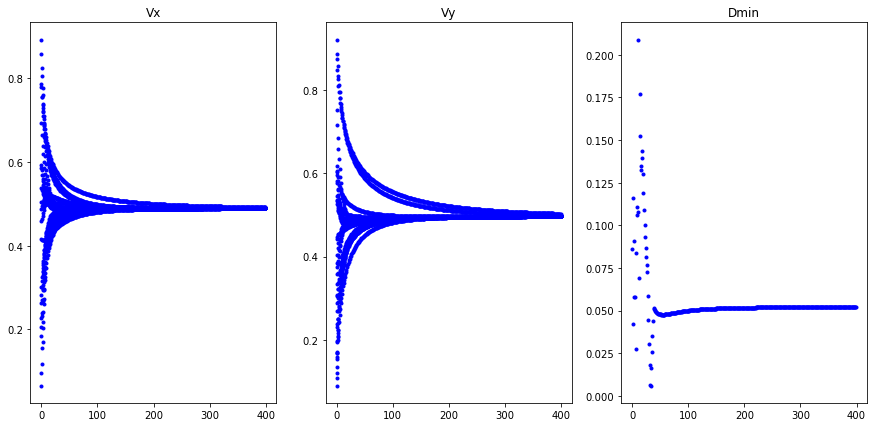

In [9]:
d = {}
N = 100
beta = 1
H = 1
b = 0.75
dmin = 1
StartCucker(2, N)
plotSmale(400, 20, beta, N, H, b)


$$
\left\{
                 \begin{array}{lr}
                 x_{k}^{'}(t)=v_{k}(t), &  \\
                 v_{k}^{'}(t)=\frac{\beta}{N}\sum_{j=1}^{N}\frac{L}{(\rho^{2}+\left\|x_{k}(t)-x_{j}(t)\right\|^{2})^{\theta}}(v_{j}(t)-v_{k}(t))\newline \quad \quad+\Lambda(v)\sum_{j\neq i}f(\left\|x_{k}(t)-x_{j}(t)\right\|^{2})(x_{j}(t)-x_{k}(t)),\quad L,\rho>0, \theta \geq 0. &
                 \end{array}
\right.
$$
这其中：
$$
\Lambda(v)=(\dfrac{1}{N}\sum_{k>j}\left\|v_{k}(t)-v_{j}(t)\right\|^{2})^{\dfrac{1}{2}},
$$
$$
f(r)=\dfrac{1}{(r-d_{0})^{2}}.
$$
这里$d_{0}$表示个体间的最短间距。

In [13]:
def CuckerFunction(beta, k, N, H, b, dmin, dim):
    s = []
    lam = 0
    for i in range(dim):
        s.append(0)
    for j in range(N):
        if j < k:
            lam += FindSpeedNorm(dim, k, j)**2
    lam = (lam / N) ** 0.5
    for j in range(N):
        a = H / (1 + FindPosNorm(dim, k, j)**2)**b
        diffv = DifferSpeed(dim, j, k)
        for i in range(dim):
            s[i] += a * diffv[i]
    for i in range(dim):
        s[i] = s[i] * beta / N
    for j in range(N):
        if j != k:
            npo = FindPosNorm(dim, k, j)**2
            diffp = DifferPos(dim, k, j)
            for i in range(dim):
                s[i] += lam * diffp[i] * 0.01 / (npo - dmin)**2
    return s

def plotCucker(times, number, beta, N, H, b, dmin):
    x = []
    y = []
    Newcrowd = chooseBird(number, N)
    plt.figure(figsize=(15, 7)) 
    for j in range(times):
        for i in range(N):
            newpo=[]
            newpox=d['Bird'+str(i)].pos[0]+1*d['Bird'+str(i)].speed[0]
            newpoy=d['Bird'+str(i)].pos[1]+1*d['Bird'+str(i)].speed[1]
            newpo.append(newpox)
            newpo.append(newpoy)
            d['Bird'+str(i)].changePos(newpo)
            s=CuckerFunction(beta, i, N, H, b, dmin, 2)
            newSpeed1=1*s[0]+d['Bird'+str(i)].speed[0]
            newSpeed2=1*s[1]+d['Bird'+str(i)].speed[1]
            newsp=[]
            newsp.append(newSpeed1)
            newsp.append(newSpeed2)
            d['Bird'+str(i)].changeSpeed(newsp)      
        for i in Newcrowd:
            plt.subplot(131)
            plt.plot(j,d['Bird'+str(i)].speed[0],'b.')
            plt.title("Vx")
            plt.subplot(132)
            plt.plot(j,d['Bird'+str(i)].speed[1],'b.')
            plt.title("Vy")
        Dmin=findDmin(N)
        plt.subplot(133)
        plt.plot(j,Dmin,'b.')
        plt.title("Dmin")
    print("鸟之间最短间距是："+str(Dmin))
    plt.show()
    plt.close()

def CPos(N, T, dt, dmin): #给出T时刻后，每只鸟的位置
    for j in range(T):
        for i in range(N):
            newpo = []
            newsp = []
            newpox = d['Bird'+str(i)].pos[0]+dt*d['Bird'+str(i)].speed[0]
            newpoy = d['Bird'+str(i)].pos[1]+dt*d['Bird'+str(i)].speed[1]
            newpo.append(newpox)
            newpo.append(newpoy)
            d['Bird'+str(i)].changePos(newpo)
            acc = CuckerFunction(beta, i, N, H, b, dmin, 2)
            d['Bird'+str(i)].changeAcce(acc)
            newsp1=d['Bird'+str(i)].speed[0]+dt*d['Bird'+str(i)].acce[0]
            newsp2=d['Bird'+str(i)].speed[1]+dt*d['Bird'+str(i)].acce[1]
            newsp.append(newsp1)
            newsp.append(newsp2)
            d['Bird'+str(i)].changeSpeed(newsp)
    x = []
    y = []
    for i in range(N):
        x.append(d['Bird'+str(i)].pos[0])
        y.append(d['Bird'+str(i)].pos[1])
    return x, y

In [56]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 50), ylim=(0, 50))
line, = ax.plot([], [],'bo',mfc='none') 
d = {}
N = 13
beta = 1
H = 1
b = 0.75
dt = 1
dmin = 1
sp = 0.5*random.uniform(0,1)
d['Bird'+str(0)] = Bird([0, 0],[sp, sp],[0, 0])
d['Origin'+str(0)] = Bird([0, 0],[sp, sp],[0, 0])
sp = 0.5*random.uniform(0,1)
d['Bird'+str(1)] = Bird([5, 0],[0.9*sp, sp],[0, 0])
d['Origin'+str(1)] = Bird([5, 0],[0.9*sp, sp],[0, 0])
sp = 0.5*random.uniform(0,1)
d['Bird'+str(2)] = Bird([10, 0],[0.8*sp, sp],[0, 0])
d['Origin'+str(2)] = Bird([10, 0],[0.8*sp, sp],[0, 0])
sp = 0.5*random.uniform(0,1)
d['Bird'+str(3)] = Bird([0, 5],[sp, 0.9*sp],[0, 0])
d['Origin'+str(3)] = Bird([0, 5],[sp, 0.9*sp],[0, 0])
sp = 0.5*random.uniform(0,1)
d['Bird'+str(4)] = Bird([5, 5],[0.9*sp, 0.9*sp],[0, 0])
d['Origin'+str(4)] = Bird([5, 5],[0.9*sp, 0.9*sp],[0, 0])
sp = 0.5*random.uniform(0,1)
d['Bird'+str(5)] = Bird([10, 5],[0.8*sp, 0.9*sp],[0, 0])
d['Origin'+str(5)] = Bird([10, 5],[0.8*sp, 0.9*sp],[0, 0])
sp = 0.5*random.uniform(0,1)
d['Bird'+str(6)] = Bird([0, 10],[sp, 0.8*sp],[0, 0])
d['Origin'+str(6)] = Bird([0, 10],[sp, 0.8*sp],[0, 0])
sp = 0.5*random.uniform(0,1)
d['Bird'+str(7)] = Bird([5, 10],[0.9*sp, 0.8*sp],[0, 0])
d['Origin'+str(7)] = Bird([5, 10],[0.9*sp, 0.8*sp],[0, 0])
sp = 0.5*random.uniform(0,1)
d['Bird'+str(8)] = Bird([10, 10],[0.8*sp, 0.8*sp],[0, 0])
d['Origin'+str(8)] = Bird([10, 10],[0.8*sp, 0.8*sp],[0, 0])
sp = 0.5*random.uniform(0,1)
d['Bird'+str(9)] = Bird([2.5, 2.5],[0.95*sp, 0.95*sp],[0, 0])
d['Origin'+str(9)] = Bird([2.5, 2.5],[0.95*sp, 0.95*sp],[0, 0])
sp = 0.5*random.uniform(0,1)
d['Bird'+str(10)] = Bird([2.5, 7.5],[0.95*sp, 0.85*sp],[0, 0])
d['Origin'+str(10)] = Bird([2.5, 7.5],[0.95*sp, 0.85*sp],[0, 0])
sp = 0.5*random.uniform(0,1)
d['Bird'+str(11)] = Bird([7.5, 2.5],[0.85*sp, 0.95*sp],[0, 0])
d['Origin'+str(11)] = Bird([7.5, 2.5],[0.85*sp, 0.95*sp],[0, 0])
sp = 0.5*random.uniform(0,1)
d['Bird'+str(12)] = Bird([7.5, 7.5],[0.85*sp, 0.85*sp],[0, 0])
d['Origin'+str(12)] = Bird([7.5, 7.5],[0.85*sp, 0.85*sp],[0, 0])

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x, y = CPos(13, 1, 1, dmin)
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=150, interval=100, blit=True)

anim.save('TangoCucker.mp4', fps=15, extra_args=['-vcodec', 'libx264'])
plt.close()

鸟之间最短间距是：1.6193427161919065


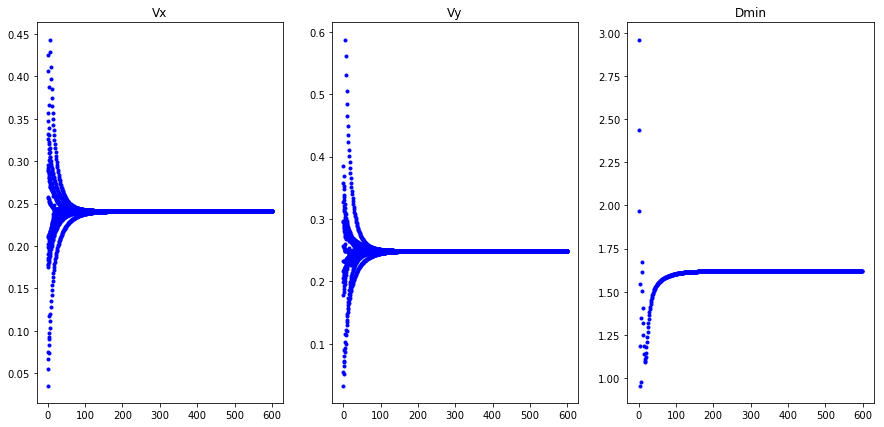

In [57]:
ToOrigin(13)
plotCucker(600, 13, beta, 13, H, b, dmin)

**参考文献**
1. Cucker F, Dong J G. Avoiding collisions in flocks [J]. IEEE Transactions on Automatic Control, 2010, 55(5): 1238-1243
2. Cucker F., & Smale S. (2007). Emergent behavior in flocks [J]. Automatic Control, IEEE Transactions on, 52(5), 852-862
3. Vicsek T., Czirók A., Ben-Jacob E., Cohen I., & Shochet O. (1995). Novel type of phase transition in a system of self-driven particles [J]. Physical review letters, 75(6), 1226